# Problem Statement:
The Bank Marketing data is related with direct marketing campaigns of a Portuguese banking institution.

*   
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

*   The classification goal is to predict if the client will subscribe a Term Deposit Taken (variable y).



### Predictor / Independent Variables :
1. **Age** : (numeric) 

2. **Job** : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”) 

3. **Marital Status** : marital status (categorical: “divorced”, “married”, “single”, “unknown”) 

4. **Education** : (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”) 

5. **Credit Default:** has credit in default? (categorical: “no”, “yes”, “unknown”). 

6. **Housing Loan** : has housing loan? (categorical: “no”, “yes”, “unknown”) 

7. **Personal Loan** : has personal loan? (categorical: “no”, “yes”, “unknown”) 

### Target / Dependent Variable :

1. **Term Deposit Taken** :  has the client subscribed a term deposit ? (binary: “1” means “Yes”, “0” means “No” )

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing as preprocess
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib.pyplot import gcf



In [0]:
df = pd.read_excel('Bank Data for case study assignment.xlsx')

In [418]:
# View the First 5 rows of DataFrame :

df.head()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


In [419]:
# View the Last 5 rows of DataFrame :

df.tail()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
1016,33,services,married,secondary,no,NaN,no,no
1017,57,self-employed,married,tertiary,yes,yes,yes,no
1018,57,technician,married,secondary,no,no,no,no
1019,28,blue-collar,married,secondary,no,no,no,no
1020,44,entrepreneur,single,tertiary,no,yes,yes,no


#Perform exploratory data analysis 

In [420]:
df.columns


Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

In [421]:
df.shape


(1021, 8)

### **Age Field - data analysis** 

In [0]:
# Binning the Data of Age to make it Categorical :

df['Age'] = pd.cut(df['age'], [10, 20, 30,40, 50, 60, 70, 80, 90], labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

Age - Unique Values :

 [21-30, 31-40, 51-60, 41-50, 11-20, 61-70, 71-80, 81-90]
Categories (8, object): [11-20 < 21-30 < 31-40 < 41-50 < 51-60 < 61-70 < 71-80 < 81-90] 

Age - No of Unique Values :

 8 

Age - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


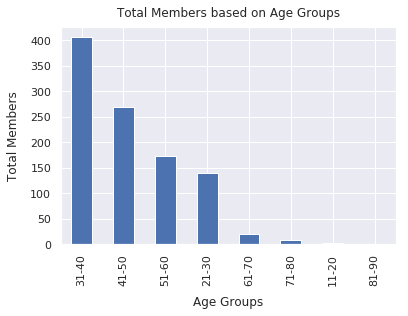

In [423]:
# Unique Age Values :

print("Age - Unique Values :\n\n",          df['Age'].unique(),'\n')
print("Age - No of Unique Values :\n\n",    df['Age'].nunique(),'\n')
# print("Age - Frequency Count Values :\n\n", data['Age'].value_counts())
print("Age - Frequency Count Values :\n\n", df['Age'].value_counts().plot(kind="bar"))
plt.xlabel("Age Groups", labelpad=10)
plt.ylabel("Total Members", labelpad=10)
plt.title("Total Members based on Age Groups", y=1.02);

### **Job Field - data analysis** 

Job - Unique Values :

 ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired' nan
 'unknown'] 


Job - No of Unique Values :

 12 


Job - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


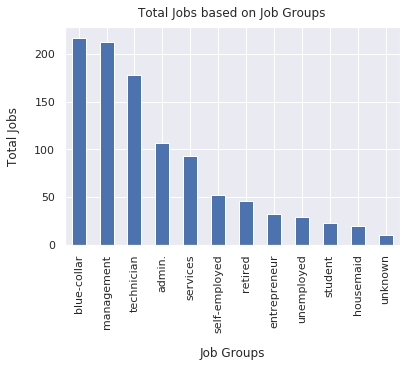

In [424]:
# Unique Job Values :

print("Job - Unique Values :\n\n",          df['job'].unique(),'\n\n')
print("Job - No of Unique Values :\n\n",    df['job'].nunique(),'\n\n')
print("Job - Frequency Count Values :\n\n", df['job'].value_counts().plot(kind="bar"))
plt.xlabel("Job Groups", labelpad=14)
plt.ylabel("Total Jobs", labelpad=14)
plt.title("Total Jobs based on Job Groups", y=1.02);

### **Marital Status Field - data analysis** 

Marital Status - Unique Values :

 ['married' 'single' 'divorced' nan] 


Marital Status - No of Unique Values :

 3 


Marital Status - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


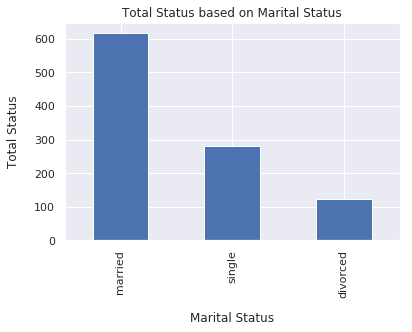

In [425]:
# Unique Marital Status Values :

print("Marital Status - Unique Values :\n\n",          df['marital status '].unique(),'\n\n')
print("Marital Status - No of Unique Values :\n\n",    df['marital status '].nunique(),'\n\n')
print("Marital Status - Frequency Count Values :\n\n", df['marital status '].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1);

### **Education Field - data analysis** 

Education - Unique Values :

 ['primary' 'secondary' 'tertiary' 'unknown' nan] 


Education - No of Unique Values :

 4 


Education - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


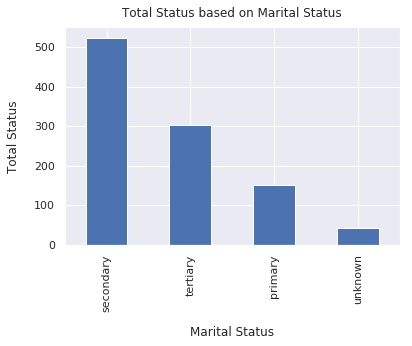

In [426]:
# Unique Education Values :

print("Education - Unique Values :\n\n",               df['education'].unique(),'\n\n')
print("Education - No of Unique Values :\n\n",         df['education'].nunique(),'\n\n')
print("Education - Frequency Count Values :\n\n", df['education'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

# NOTE : We have Inconsistent 4th Category - 'unknown'.

### **Credit Defaul Field - data analysis** 

Credit Default - Unique Values :

 ['no' 'yes' nan] 


Credit Default - No of Unique Values :

 2 


Credit Default - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


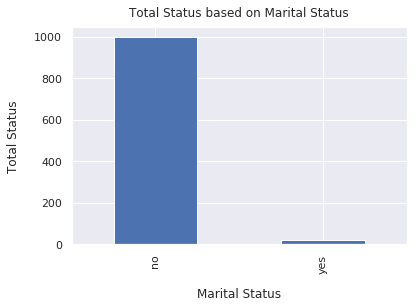

In [427]:
# Unique Credit Default Values :

print("Credit Default - Unique Values :\n\n",          df['credit default?'].unique(),'\n\n')
print("Credit Default - No of Unique Values :\n\n",    df['credit default?'].nunique(),'\n\n')
print("Credit Default - Frequency Count Values :\n\n", df['credit default?'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

### **Housing Loan Field - data analysis** 

Housing Loan - Unique Values :

 ['no' 'yes' nan 'xxxyy'] 


Housing Loan - No of Unique Values :

 3 


Housing Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


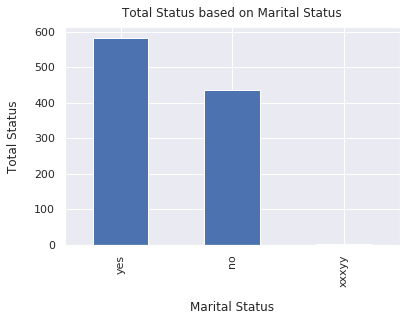

In [428]:
# Unique Housing Loan Values :

print("Housing Loan - Unique Values :\n\n",          df['housing loan?'].unique(),'\n\n')
print("Housing Loan - No of Unique Values :\n\n",    df['housing loan?'].nunique(),'\n\n')
print("Housing Loan - Frequency Count Values :\n\n", df['housing loan?'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

# NOTE : We have Inconsistent 3rd Category - 'xxxyy'.

In [0]:
df['housing loan?'] = df['housing loan?'].str.replace('xxxyy','yes')

Housing Loan - Unique Values :

 ['no' 'yes' nan] 


Housing Loan - No of Unique Values :

 2 


Housing Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


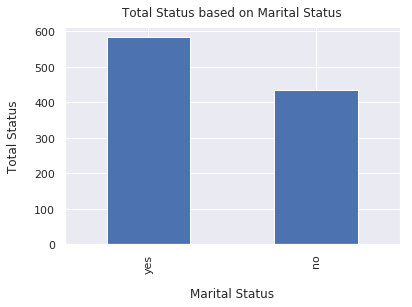

In [430]:
# Unique Housing Loan Values :

print("Housing Loan - Unique Values :\n\n",          df['housing loan?'].unique(),'\n\n')
print("Housing Loan - No of Unique Values :\n\n",    df['housing loan?'].nunique(),'\n\n')
print("Housing Loan - Frequency Count Values :\n\n", df['housing loan?'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

# NOTE : We have Inconsistent 3rd Category - 'xxxyy' => Replaced with Yes.

### **Personal Loan Field - data analysis** 

Personal Loan - Unique Values :

 ['no' 'yes' nan] 


Personal Loan - No of Unique Values :

 2 


Personal Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


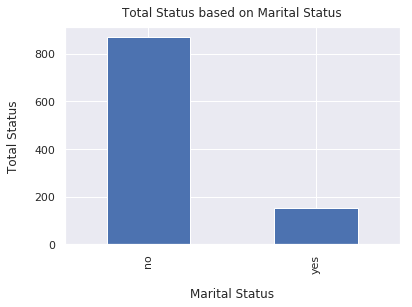

In [431]:
# Unique Personal Loan Values :

print("Personal Loan - Unique Values :\n\n",       df['Personal loan'].unique(),'\n\n')
print("Personal Loan - No of Unique Values :\n\n", df['Personal loan'].nunique(),'\n\n')
print("Personal Loan - Frequency Count Values :\n\n", df['Personal loan'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

### **Term Deposit Taken Field - data analysis** 

Term Deposit Taken - Unique Values :

 ['no' 'yes'] 


Term Deposit Taken - No of Unique Values :

 2 


Term Deposit Taken - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


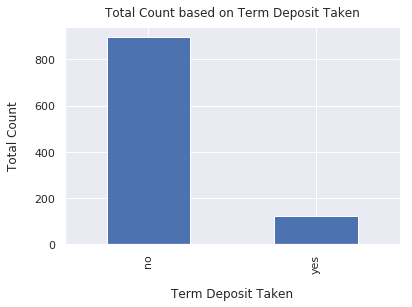

In [432]:
# Unique Term Deposit Taken Values :

print("Term Deposit Taken - Unique Values :\n\n",       df['y'].unique(),'\n\n')
print("Term Deposit Taken - No of Unique Values :\n\n", df['y'].nunique(),'\n\n')
print("Term Deposit Taken - Frequency Count Values :\n\n", df['y'].value_counts().plot(kind="bar"))
plt.xlabel("Term Deposit Taken", labelpad=14)
plt.ylabel("Total Count", labelpad=14)
plt.title("Total Count based on Term Deposit Taken", y=1.02);

# Preprocess the data :

### 1. Dropping NA Values:

In [433]:
#Data information before preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 9 columns):
age                1021 non-null int64
job                1019 non-null object
marital status     1020 non-null object
education          1020 non-null object
credit default?    1020 non-null object
housing loan?      1019 non-null object
Personal loan      1019 non-null object
y                  1021 non-null object
Age                1021 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 65.3+ KB


In [434]:
# Data frame length before preprocessing
len(df)

1021

In [435]:
# Printing Sum of Missing Values in Each Column :
total_null = df.isnull().sum().sort_values(ascending=False)
print(total_null)

Personal loan      2
housing loan?      2
job                2
credit default?    1
education          1
marital status     1
Age                0
y                  0
age                0
dtype: int64


In [0]:
 df1 = df[df.isna().any(axis=1)]

In [437]:
df1.index

Int64Index([79, 97, 108, 109, 168, 1000, 1004, 1016], dtype='int64')

In [0]:
df3 = df.drop(df1.index.tolist())

In [439]:
# Data information after preprocessing
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1020
Data columns (total 9 columns):
age                1013 non-null int64
job                1013 non-null object
marital status     1013 non-null object
education          1013 non-null object
credit default?    1013 non-null object
housing loan?      1013 non-null object
Personal loan      1013 non-null object
y                  1013 non-null object
Age                1013 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 72.6+ KB


In [440]:
# Data frame length after preprocessing
len(df3)

1013

# Select Training data, test data

In [0]:
label_encode_job = preprocess.LabelEncoder()
label_encode_marital = preprocess.LabelEncoder()
label_encode_eduction = preprocess.LabelEncoder()
label_encode_credit = preprocess.LabelEncoder()
label_encode_housing = preprocess.LabelEncoder()
label_encode_person = preprocess.LabelEncoder()
label_encode_y = preprocess.LabelEncoder()

In [442]:
label_encode_job.fit(df3['job'].tolist())
label_encode_marital.fit(df3['marital status '].tolist())
label_encode_eduction.fit(df3['education'].tolist())
label_encode_credit.fit(df3['credit default?'].tolist())
label_encode_housing.fit(df3['housing loan?'].tolist())
label_encode_person.fit(df3['Personal loan'].tolist())
label_encode_y.fit(df3['y'].tolist())

LabelEncoder()

In [0]:
job_ = label_encode_job.transform(df3['job'].tolist())
marital_ = label_encode_marital.transform(df3['marital status '].tolist())
education_ = label_encode_eduction.transform(df3['education'].tolist())
credit_ = label_encode_credit.transform(df3['credit default?'].tolist())
housing_ = label_encode_housing.transform(df3['housing loan?'].tolist())
person_ = label_encode_person.transform(df3['Personal loan'].tolist())
y_ = label_encode_y.transform(df3['y'].tolist())

In [0]:
df_2 = copy.copy(df3)

In [0]:
#df_2.drop(['Age'], axis=1)
del df_2['Age']


In [446]:
df_2.head()


,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


In [0]:
feature_cols =['age','job','matrial_status ', 'education', 'credit','housing_loan', 'personal_loan']

In [0]:
df_to_use = pd.DataFrame(data=list(zip(df_2.age.tolist(),job_,marital_,education_,credit_,housing_,person_,y_)), 
             columns=['age','job','matrial_status ', 'education', 'credit','housing_loan', 'personal_loan','y'])

In [0]:
y = df_to_use.y
X = df_to_use.drop('y', axis=1)

In [0]:
train_data, test_data, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2, random_state=13)

In [451]:
train_data[:10]

,age,job,matrial_status,education,credit,housing_loan,personal_loan
66,31,7,1,1,0,1,0
293,38,2,1,1,0,1,1
329,30,4,2,2,0,0,0
754,50,6,0,2,0,1,0
727,46,9,1,1,0,0,1
514,61,5,1,1,0,0,0
888,29,4,2,2,0,1,0
133,34,4,2,2,0,0,0
219,54,4,1,0,0,1,0
573,59,1,1,0,0,1,0


# Train the model

In [452]:
# Building the classifier with criterion Entropy
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
# Training the classifier
decision_tree_classifier.fit(train_data,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
prediction = decision_tree_classifier.predict(test_data)

In [454]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [0]:
# We are calculating accuracy on testing data
accuracy = metrics.accuracy_score(test_y,prediction)

In [456]:
print('Decision tree with Entropy index : ', accuracy*100)

Decision tree with Entropy index :  90.64039408866995


In [457]:
metrics.confusion_matrix(test_y,prediction)

array([[184,   0],
       [ 19,   0]])

In [458]:

from collections import Counter
Counter(test_y)

Counter({0: 184, 1: 19})

In [459]:
print(metrics.classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       184
           1       0.00      0.00      0.00        19

    accuracy                           0.91       203
   macro avg       0.45      0.50      0.48       203
weighted avg       0.82      0.91      0.86       203



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


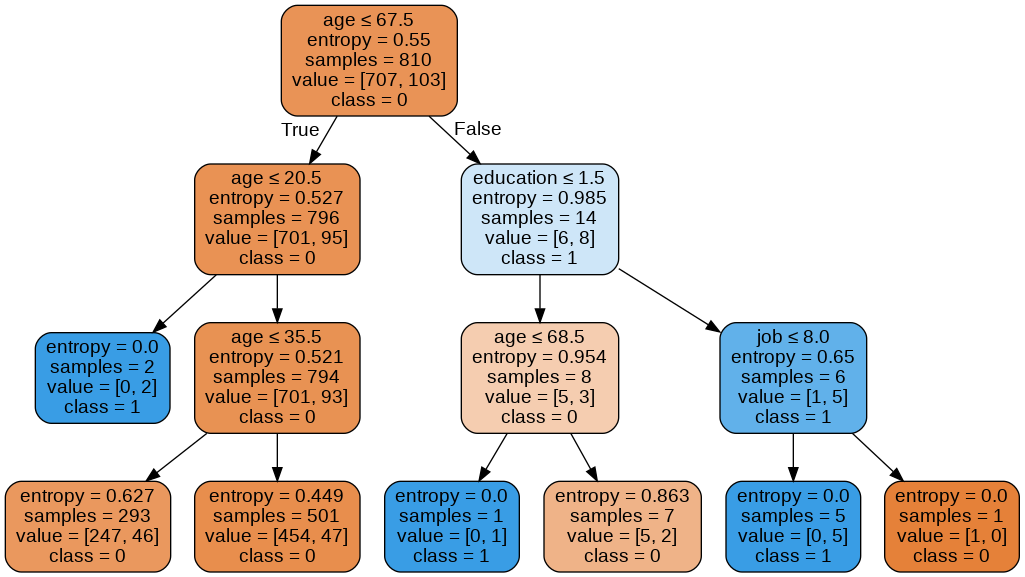

In [460]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('BankLoan.png')
Image(graph.create_png())

Building the classifier with criterion **Gini**

In [461]:
decision_tree_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
# Training the classifier
decision_tree_classifier.fit(train_data,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
prediction = decision_tree_classifier.predict(test_data)

In [463]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [0]:
# We are calculating accuracy on testing data
accuracy = metrics.accuracy_score(test_y,prediction)

In [465]:
print('Decision tree with Gini index : ', accuracy*100)

Decision tree with Gini index :  90.64039408866995


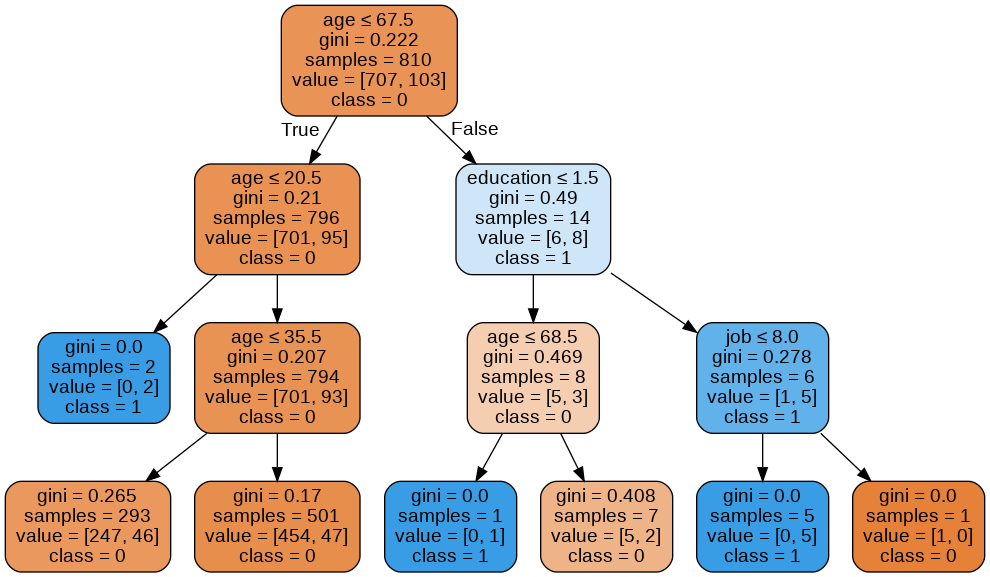

In [466]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('BankLoan.png')
Image(graph.create_png())

In [0]:
# Cross validation using gini index and entropy 15 cv
# ROC and AUC curve plotting

# Computing cross-validated metrics

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(df2.data, df2.target, test_size=0.4, random_state=0)
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.4, random_state=0)

In [469]:
X_train.shape, y_train.shape

((607, 7), (607,))

In [470]:
X_test.shape, y_test.shape

((406, 7), (406,))

In [0]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [472]:
clf.score(X_test, y_test) 

0.8842364532019704

In [473]:
clf = svm.SVC(kernel='linear', C=1)
clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [475]:
scores

array([0.87704918, 0.87704918, 0.87603306, 0.87603306, 0.87603306])

In [476]:
 print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  
 

Accuracy: 0.88 (+/- 0.00)


In [477]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

In [0]:
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [0]:
X = X_train
y = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y.shape[1]

In [480]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


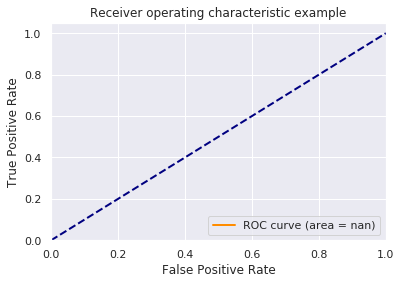

In [481]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Plot ROC curves for the multiclass problem

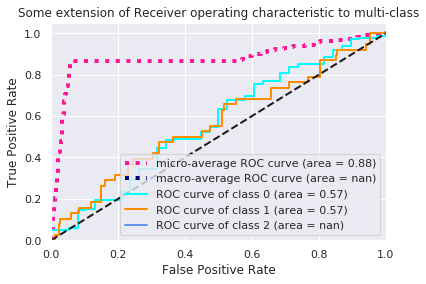

In [482]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()